<a href="https://colab.research.google.com/github/Evelyn-Rojas/Ecuaciones-diferenciales-parciales-ll/blob/main/TAREA3_DiferenciasProgresivas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color= 'salmon'> **TAREA 3**

<font color='salmon'> **Evelyn Tania Rojas Roa**
____________

###<font color='darkorange'>**Método de diferencias progresivas**

### <font color='coral'> **Ecuación de calor**

$$\frac{\partial^2 u}{\partial x^2} +\frac{\partial u}{\partial t} = 0$$
Sujeta a:
$$u(0,t)=0,u(1,t)=0, \;\;\; t<1$$

$$
u(x,0) = sen (πx), 0≤ x ≤ 1 \quad
$$

Tomaremos los siguientes valores:
* $h= 0.1$
* $k = 0.0005$

Y el caso para:
* $T= 0.5$

El requisito de que $$
\frac{k}{h^2} ≤ 0.5
$$

en los métodos de diferencias progresivas se debe a que asegura la estabilidad numérica. Si esta condición no se cumple, las soluciones discretas de la ecuación diferencial pueden crecer de forma no deseada, volviéndose inestables y divergentes, y no aproximando la solución real de la ecuación.

Fórmula a implementar:

$$
u_{i,j+1} = \left(1 - \frac{2\alpha^2 k}{h^2}\right) u_{i,j} + \frac{k\alpha^2}{h^2} \left(u_{i+1,j} + u_{i-1,j}\right)
$$


=== Comparación entre solución numérica y analítica  ===

 x_i  u_exacta(x_i,0.5)  u_numérica(x_i,0.5)  |Error|
 0.0           0.000000             0.000000 0.000000
 0.1           0.002222             0.002287 0.000064
 0.2           0.004227             0.004349 0.000122
 0.3           0.005818             0.005986 0.000168
 0.4           0.006840             0.007037 0.000197
 0.5           0.007192             0.007399 0.000207
 0.6           0.006840             0.007037 0.000197
 0.7           0.005818             0.005986 0.000168
 0.8           0.004227             0.004349 0.000122
 0.9           0.002222             0.002287 0.000064
 1.0           0.000000             0.000000 0.000000


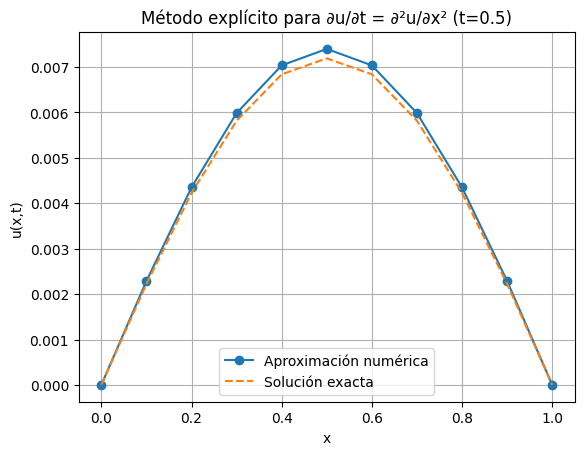

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Parámetros
L = 1.0
h = 0.1
k = 0.0005
r = k / h**2  # El valor de este nos dará la estabilidad
#en este caso tomaremos a alpha como 0

x = np.arange(0, L + h, h)
n = len(x)
t_total = 0.5
nt = int(t_total / k)
u = np.sin(np.pi * x) #condicion inicial

# Condiciones de frontera
u[0] = 0
u[-1] = 0

for j in range(nt):
    u_new = u.copy()
    for i in range(1, n - 1):
        u_new[i] = (1 - 2 * r) * u[i] + r * (u[i + 1] + u[i - 1])
    u = u_new

u_exacta = np.exp(-np.pi**2 * t_total) * np.sin(np.pi * x) #solucion exacta
error = np.abs(u_exacta - u) #error
#Tabla
tabla = pd.DataFrame({
    'x_i': x,
    'u_exacta(x_i,0.5)': np.round(u_exacta, 8),
    'u_numérica(x_i,0.5)': np.round(u, 8),
    '|Error|': np.round(error, 8)
})

print("\n=== Comparación entre solución numérica y analítica  ===\n")
print(tabla.to_string(index=False))

# Gráfica
plt.plot(x, u, 'o-', label='Aproximación numérica')
plt.plot(x, u_exacta, '--', label='Solución exacta')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.title('Método explícito para ∂u/∂t = ∂²u/∂x² (t=0.5)')
plt.grid(True)
plt.show()

* Nota: Para ajustar a otro problema solo basta con cambiar los parámetros.